<a href="https://www.kaggle.com/code/aneevinay/introvert-prediction-finding-best-model?scriptVersionId=255239523" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introvert prediction- Comparison of different models

![Introverts Prediction](/kaggle/input/introvert-image/pexels-mikhail-nilov-7929418.jpg)

Understanding personality traits such as introversion and extroversion can help in tailoring educational methods, workplace arrangements, and even marketing strategies. In this project, we aim to predict whether a person is introverted based on various features (like behavior, preferences, and responses to certain situations).

The goal of this project is to:

* Understand the relationship between personality-related features and introversion.

* Build and compare multiple machine learning models to predict introversion.

* Evaluate the performance of each model to determine the best-suited algorithm.



# Load Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Read the Data

In [2]:
df=pd.read_csv('/kaggle/input/extrovert-vs-introvert-behavior-data/personality_dataset.csv')

# Check the Data

In [3]:
df.shape

(2900, 8)

## Glimpse the Data

In [4]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [5]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


## Check Missing values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [7]:
df.isnull().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

In this dataset, missing values are treated as meaningful absences rather than random data loss.

Certain traits or behaviors—like preferring solitude, avoiding group activities, or disliking social events—are considered noticeable traits when present. Therefore, when a response is missing, it is interpreted as the absence of that trait (i.e., the individual does not exhibit that behavior strongly enough to be marked).


In [8]:
df.fillna({
    'Time_spent_Alone': 0.0,
    'Stage_fear': 'No',
    'Social_event_attendance': 0.0,
    'Going_outside': 0.0,
    'Drained_after_socializing': 'No',
    'Friends_circle_size': 0.0,
    'Post_frequency': 0.0
}, inplace=True)

In [9]:
df.isnull().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

## Data Unbalance

In [10]:
df['Personality'].value_counts()

Personality
Extrovert    1491
Introvert    1409
Name: count, dtype: int64

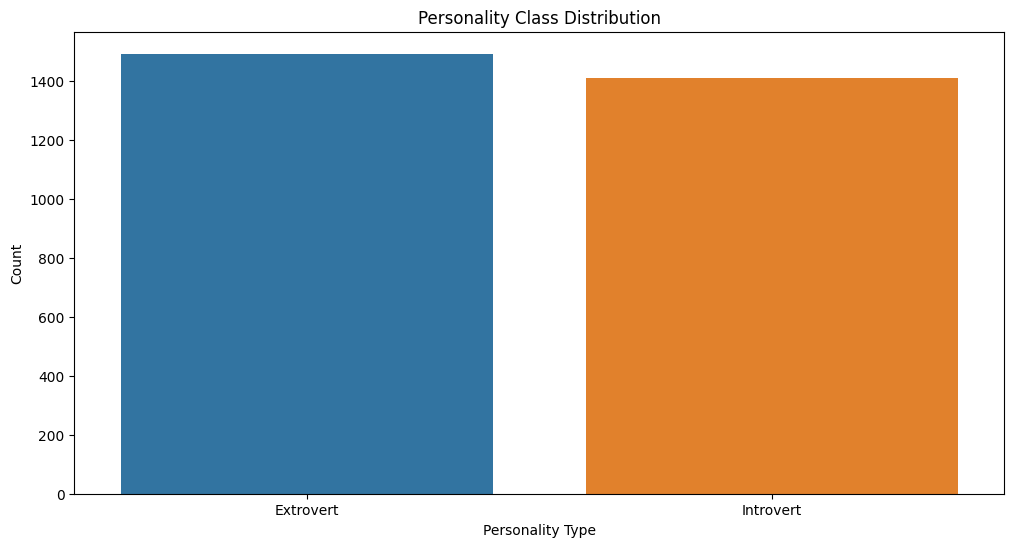

<Figure size 640x480 with 0 Axes>

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Personality', data=df)
plt.title('Personality Class Distribution')
plt.xlabel('Personality Type')
plt.ylabel('Count')
plt.show()
plt.savefig('Personality class distribution.png')

This is a balanced Dataset

# Data Exploration

## Distributions

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

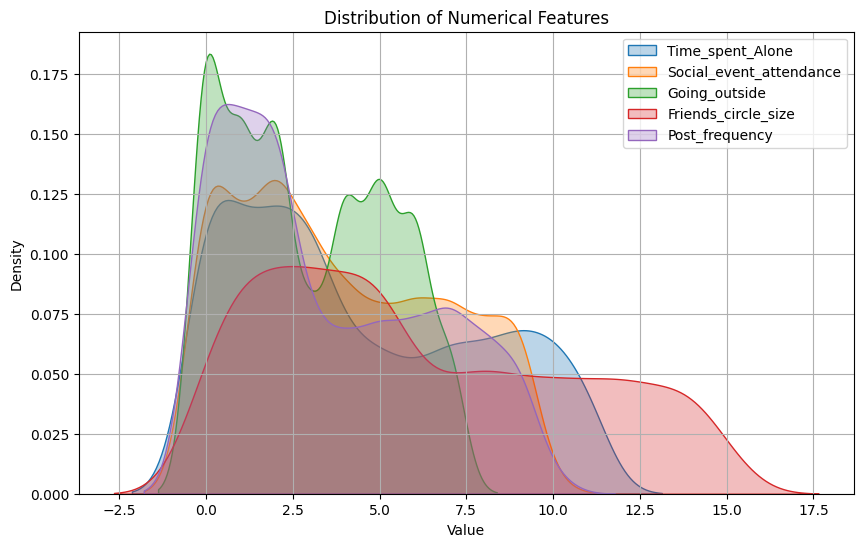

<Figure size 640x480 with 0 Axes>

In [12]:
num_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
            'Friends_circle_size', 'Post_frequency']

plt.figure(figsize=(10, 6))

for col in num_cols:
    sns.kdeplot(df[col], label=col, fill=True, alpha=0.3)

plt.title("Distribution of Numerical Features")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('Distribution of numerical features.png')

## Group Differences

In [13]:
group_means = df.groupby('Personality')[num_cols].mean()
group_means

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
Personality,,,,,
Extrovert,2.020121,5.903421,4.525822,8.927565,5.513749
Introvert,6.934705,1.735983,1.244855,3.112846,1.337828


Introverts spent more time alone than Extrovert but social event attendance, going outside,friend circle size and post frequency are more for extroverts.

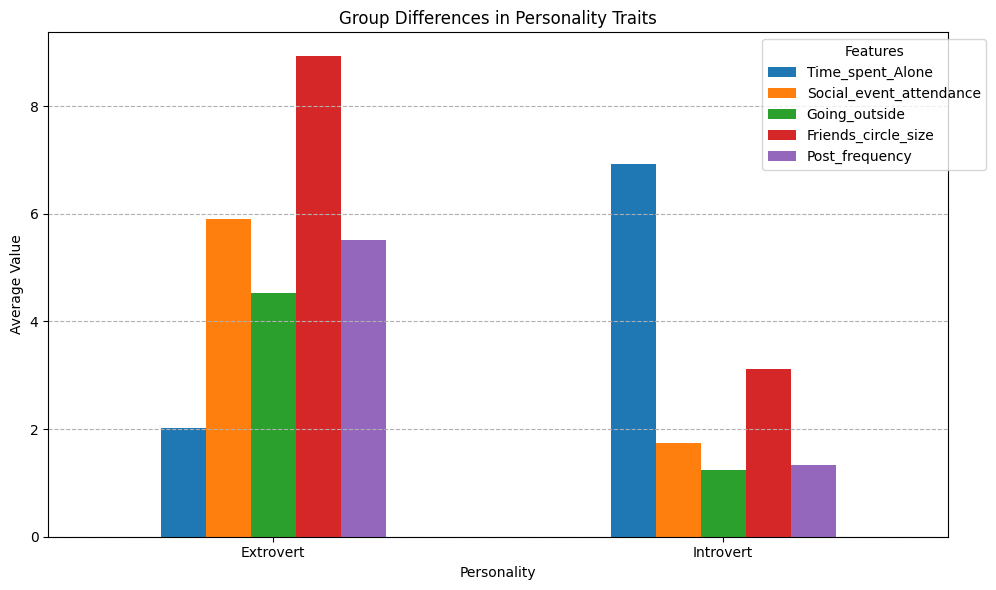

<Figure size 640x480 with 0 Axes>

In [14]:
group_means.plot(kind='bar', figsize=(10,6))
plt.title('Group Differences in Personality Traits')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.legend(title='Features', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()
plt.savefig('Group_differences_in_personality_traits.png')

## Feature Relationships

In [15]:
corr = df[num_cols].corr()
corr

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
Time_spent_Alone,1.000000,-0.697085,-0.708255,-0.669866,-0.693264
Social_event_attendance,-0.697085,1.000000,0.705546,0.684889,0.701976
Going_outside,-0.708255,0.705546,1.000000,0.684853,0.733656
Friends_circle_size,-0.669866,0.684889,0.684853,1.000000,0.653779
Post_frequency,-0.693264,0.701976,0.733656,0.653779,1.000000


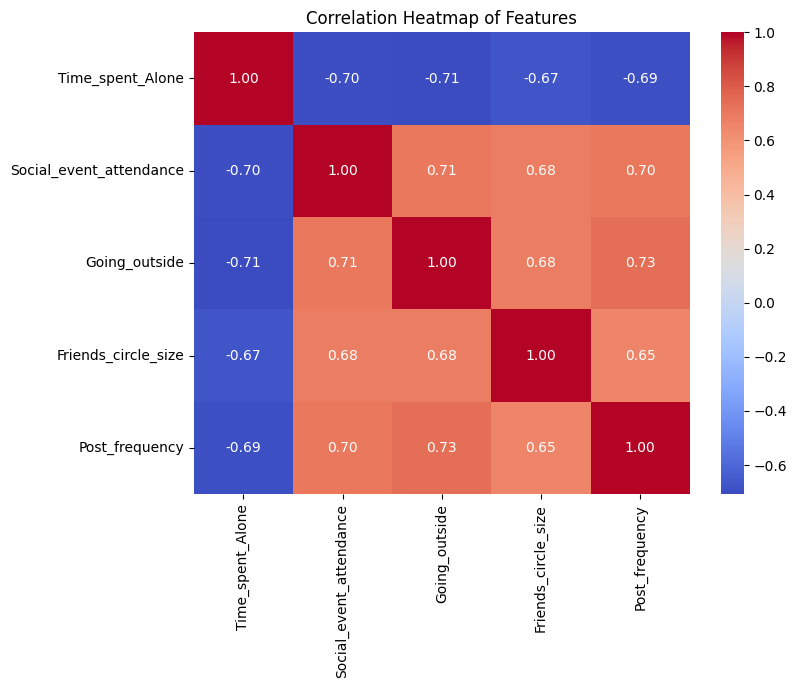

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

social behaviors are strongly interrelated, with introverted traits negatively correlated and extroverted traits positively correlated across activities and interactions.

# Predictive models

## Encodding the Categorical variables

In [17]:
columns = ['Stage_fear', 'Drained_after_socializing'] 

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  
encoded_data = ohe.fit_transform(df[columns])

encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(columns), index=df.index)

df = pd.concat([df.drop(columns, axis=1), encoded_df], axis=1)


## Define Predictors and Target values

In [18]:
X=df.drop('Personality',axis=1)
y=df['Personality']

## Split data in Train,Test and Validation set

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

# Model Comparison

In [20]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'GaussianNB': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)               
    y_pred = model.predict(X_test)            
    accuracy = accuracy_score(y_test, y_pred) 
    print(f'{name}: Accuracy = {accuracy:.4f}')


Logistic Regression: Accuracy = 0.9121
Decision Tree: Accuracy = 0.8552
Random Forest: Accuracy = 0.9121
Support Vector Machine: Accuracy = 0.9293
GaussianNB: Accuracy = 0.9293
K-Nearest Neighbors: Accuracy = 0.9241


**GaussianNB is a great choice for fast and efficient predictions when the assumptions (feature independence and categorical distribution) are acceptable**.

# Confusion Matrix

In [21]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [22]:
y_pred = gnb.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[260,  23],
       [ 18, 279]])

In [23]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n   Extrovert       0.94      0.92      0.93       283\n   Introvert       0.92      0.94      0.93       297\n\n    accuracy                           0.93       580\n   macro avg       0.93      0.93      0.93       580\nweighted avg       0.93      0.93      0.93       580\n'

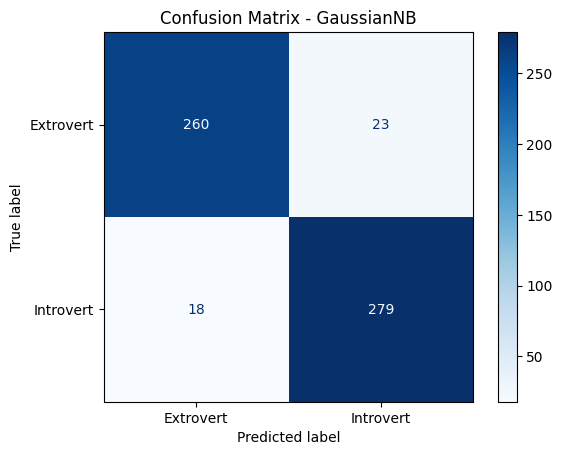

<Figure size 640x480 with 0 Axes>

In [24]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - GaussianNB")
plt.grid(False)
plt.show()
plt.savefig('Confusion_matrix_Gaussian.png')

# Conclusion

**The Gaussian Naive Bayes model performs consistently and reliably, achieving 93% accuracy, and showing minimal bias toward either class.**

** If you found this analysis helpful or insightful, please consider upvoting this notebook**